In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

In [ ]:
# Cargar base desde CSV
base_total = pd.read_excel("bbdd/base_total_homologada.xlsx")

# Ver las primeras filas
print(base_total.head())

base_total




   anio                                           CARRERA  \
0  2020                                        Astronomía   
1  2023                                     Bioingeniería   
2  2023                              Ingeniería Comercial   
3  2020                             Nutrición y Dietética   
4  2020  Traducción/Interpretación en Idiomas Extranjeros   

               INGRESO  PTJE_PONDERADO  PTJE_PONDERADO_PACE NACIONALIDAD  \
0  Técnico Profesional          644.40                  NaN      Chilena   
1  Técnico Profesional          646.95                  NaN      Chilena   
2  Técnico Profesional          641.40                  NaN      Chilena   
3  Técnico Profesional          585.50                  NaN      Chilena   
4  Técnico Profesional          580.00                  NaN      Chilena   

        SEXO                             NOMBRE_COLEGIO_EGRESO  \
0  MASCULINO                         LICEO TECNICO ANTOFAGASTA   
1  MASCULINO    COLEGIO BICENTENARIO ENRIQUE

,anio,CARRERA,INGRESO,PTJE_PONDERADO,PTJE_PONDERADO_PACE,NACIONALIDAD,SEXO,NOMBRE_COLEGIO_EGRESO,GRUPO_DEPENDENCIA,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,MATEMATICA_1,COMPRENSION_LECTORA,FECHA_NACIMIENTO,ANIO,GRUPO_DEPENDENCIA_EST,SEDE
0,2020,Astronomía,Técnico Profesional,644.40,NaN,Chilena,MASCULINO,LICEO TECNICO ANTOFAGASTA,MUNICIPAL,2,2101,6.28,683.0,774.0,574.0,571.0,17112001.0,2020,MUNICIPAL,CONCEPCIÓN
1,2023,Bioingeniería,Técnico Profesional,646.95,NaN,Chilena,MASCULINO,COLEGIO BICENTENARIO ENRIQUE SALINAS BUSCOVICH,PART. SUBVENC,16.0,16101.0,5.53,582.0,584.0,704.0,816.0,NaN,2023,PARTICULARES SUBVENCIONADOS,CONCEPCIÓN
2,2023,Ingeniería Comercial,Técnico Profesional,641.40,NaN,Chilena,FEMENINO,COLEGIO BICENTENARIO ENRIQUE SALINAS BUSCOVICH,PART. SUBVENC,16.0,16101.0,6.00,715.0,780.0,516.0,745.0,NaN,2023,PARTICULARES SUBVENCIONADOS,CONCEPCIÓN
3,2020,Nutrición y Dietética,Técnico Profesional,585.50,NaN,Chilena,FEMENINO,LICEO TÃ‰CNICO PROFESIONAL JORGE SÃNCHEZ UGARTE,PART. SUBVENC.,8,8101,6.20,666.0,713.0,524.0,503.0,2042002.0,2020,PARTICULARES SUBVENCIONADOS,CONCEPCIÓN
4,2020,Traducción/Interpretación en Idiomas Extranjeros,Técnico Profesional,580.00,NaN,Chilena,FEMENINO,LICEO POLITECNICO PARTICULAR HANNOVER,PART. SUBVENC.,13,13119,5.90,602.0,627.0,545.0,536.0,18102001.0,2020,PARTICULARES SUBVENCIONADOS,CONCEPCIÓN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,2024,Teatro,"Destacado en Artes, Ciencias o Letras",627.15,NaN,Chilena,FEMENINO,COLEGIO PRECIOSA SANGRE,PART. SUBVENC.,10,10303,6.18,765.0,781.0,549.0,600.0,26102005.0,2024,PARTICULARES SUBVENCIONADOS,CONCEPCIÓN
30108,2025,Teatro,"Destacado en Artes, Ciencias o Letras",626.45,NaN,Chilena,FEMENINO,COLEGIO BICENTENARIO ESPAÃ‘A,S.L.E.P.,8,8101,6.13,751.0,779.0,496.0,557.0,27092006.0,2025,SLEP,CONCEPCIÓN
30109,2021,Nan,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,SIN INFORMACIÓN,CONCEPCIÓN
30110,2022,Nan,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,SIN INFORMACIÓN,CONCEPCIÓN


In [17]:
# Asegurarse de que ANIO sea numérico
base_total["ANIO"] = pd.to_numeric(base_total["ANIO"], errors="coerce")

# Filtrar para años desde 2023
base_total = base_total[base_total["ANIO"] >= 2023].copy()

# Verificar el resultado
print(base_total["ANIO"].value_counts().sort_index())


2023    5070
2024    5234
2025    5251
Name: ANIO, dtype: int64


 Esta podría ser la primera base de datos referida,a por ejemplo, a promedios. De igual forma, se podría crear otra que sea puntaje de corte, aunque en todo caso la idea es ser más claro con el CADE. 
 

In [18]:
import pandas as pd

# Asumiendo que tu DataFrame se llama df
base_total['PTJE_PONDERADO_TOTAL'] = base_total['PTJE_PONDERADO'].fillna(base_total['PTJE_PONDERADO_PACE'])

# Agrupar por carrera y año, y calcular promedio
promedios = (
    base_total.groupby(['CARRERA', 'ANIO'])['PTJE_PONDERADO_TOTAL']
    .mean()
    .reset_index()
    .rename(columns={'PTJE_PONDERADO_TOTAL': 'PROMEDIO_PONDERADO'})
)

print(promedios)


                                              CARRERA  ANIO  \
0           Administración Pública y Ciencia Política  2023   
1           Administración Pública y Ciencia Política  2024   
2           Administración Pública y Ciencia Política  2025   
3                                           Agronomía  2023   
4                                           Agronomía  2024   
..                                                ...   ...   
220                                    Trabajo Social  2024   
221                                    Trabajo Social  2025   
222  Traducción/Interpretación en Idiomas Extranjeros  2023   
223  Traducción/Interpretación en Idiomas Extranjeros  2024   
224  Traducción/Interpretación en Idiomas Extranjeros  2025   

     PROMEDIO_PONDERADO  
0          12904.225570  
1            760.600610  
2          35052.730000  
3            643.072419  
4          12523.957092  
..                  ...  
220        11451.326712  
221        12125.676027  
222      

Acá creamos una nueva base de datos que refiere a la proporción por sexo. 

In [ ]:
# Asegúrate de que 'SEXO' esté estandarizado (por ejemplo: "FEMENINO", "MASCULINO")
# Si el DataFrame se llama base_total y ya contiene las columnas 'CARRERA_LIMPIA', 'ANIO' y 'SEXO':

# Paso 1: Crear tabla de conteo
tabla_conteo = (
    base_total
    .groupby(['CARRERA', 'ANIO', 'SEXO'])
    .size()
    .reset_index(name='n')
)

# Paso 2: Calcular proporciones dentro de cada grupo CARRERA x AÑO
tabla_conteo['proporcion'] = (
    tabla_conteo
    .groupby(['CARRERA', 'ANIO'])['n']
    .transform(lambda x: x / x.sum())
)

# Paso 3 (opcional): ordenar la tabla para facilitar lectura
tabla_conteo = tabla_conteo.sort_values(by=['CARRERA', 'ANIO', 'SEXO'])

# Mostrar la tabla
print(tabla_conteo)



                                              CARRERA  ANIO       SEXO   n  \
0           Administración Pública y Ciencia Política  2023   FEMENINO  45   
1           Administración Pública y Ciencia Política  2023  MASCULINO  34   
2           Administración Pública y Ciencia Política  2024   FEMENINO  44   
3           Administración Pública y Ciencia Política  2024  MASCULINO  38   
4           Administración Pública y Ciencia Política  2025   FEMENINO  57   
..                                                ...   ...        ...  ..   
441  Traducción/Interpretación en Idiomas Extranjeros  2023  MASCULINO  20   
442  Traducción/Interpretación en Idiomas Extranjeros  2024   FEMENINO  75   
443  Traducción/Interpretación en Idiomas Extranjeros  2024  MASCULINO  11   
444  Traducción/Interpretación en Idiomas Extranjeros  2025   FEMENINO  61   
445  Traducción/Interpretación en Idiomas Extranjeros  2025  MASCULINO  19   

     proporcion  
0      0.569620  
1      0.430380  
2      0.

In [20]:
import pandas as pd

# Variables de puntaje que te podrían interesar
puntajes = ['PTJE_PONDERADO', 'PTJE_NEM', 'PTJE_RANKING', 'MATEMATICA_1', 'COMPRENSION_LECTORA']

# Crear tabla con estadísticas por carrera y grupo de dependencia
tabla_puntajes = (
    base_total
    .groupby(['CARRERA', 'GRUPO_DEPENDENCIA_EST'])[puntajes]
    .agg(['mean', 'median', 'min', 'max', 'count'])
    .reset_index()
)

# Mostrar la tabla
print(tabla_puntajes)


                                              CARRERA  \
                                                        
0           Administración Pública y Ciencia Política   
1           Administración Pública y Ciencia Política   
2           Administración Pública y Ciencia Política   
3           Administración Pública y Ciencia Política   
4           Administración Pública y Ciencia Política   
..                                                ...   
340  Traducción/Interpretación en Idiomas Extranjeros   
341  Traducción/Interpretación en Idiomas Extranjeros   
342  Traducción/Interpretación en Idiomas Extranjeros   
343  Traducción/Interpretación en Idiomas Extranjeros   
344  Traducción/Interpretación en Idiomas Extranjeros   

           GRUPO_DEPENDENCIA_EST PTJE_PONDERADO                           \
                                           mean   median     min     max   
0                      MUNICIPAL     772.013559  766.650  594.90  877.40   
1           PARTICULARES PAGAD

In [21]:
# Crear carpeta para guardar los geojson
os.makedirs("comunas_geojson", exist_ok=True)

# Base URL del repositorio
base_url = "https://raw.githubusercontent.com/robsalasco/censo_2017_geojson_chile/master/Comunas/"

# Lista de archivos por región (R01 a R16)
region_codes = [f"R{str(i).zfill(2)}.geojson" for i in range(1, 17)]

# Descargar todos los archivos geojson
for filename in region_codes:
    url = base_url + filename
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"comunas_geojson/{filename}", "wb") as f:
            f.write(response.content)
        print(f"Descargado: {filename}")
    else:
        print(f"Error al descargar: {filename}")

# Cargar todos los archivos .geojson y unirlos
import glob

geojson_files = glob.glob("comunas_geojson/R*.geojson")

comunas_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(file) for file in geojson_files],
    ignore_index=True
))

# Ver columnas disponibles
print("Columnas disponibles en geojson:", comunas_gdf.columns)


Descargado: R01.geojson
Descargado: R02.geojson
Descargado: R03.geojson
Descargado: R04.geojson
Descargado: R05.geojson
Descargado: R06.geojson
Descargado: R07.geojson
Descargado: R08.geojson
Descargado: R09.geojson
Descargado: R10.geojson
Descargado: R11.geojson
Descargado: R12.geojson
Descargado: R13.geojson
Descargado: R14.geojson
Descargado: R15.geojson
Descargado: R16.geojson
Columnas disponibles en geojson: Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [22]:
# Revisar columnas y asignar columna de código comunal
print("Columnas disponibles:", comunas_gdf.columns)
comunas_gdf["codigo_comuna"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Asegurar que los códigos comunales tengan 5 dígitos (rellenar con ceros si es necesario)
base_total["CODIGO_COMUNA"] = base_total["CODIGO_COMUNA"].astype(str).str.zfill(5)
comunas_gdf["codigo_comuna"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Leer y estandarizar shapefile
#comunas_gdf = gpd.read_file("comunas_geojson/R13.geojson")
comunas_gdf["codigo_comuna"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Excluir Isla de Pascua
comunas_gdf = comunas_gdf[~comunas_gdf["NOM_COMUNA"].str.upper().str.contains("ISLA DE PASCUA")]


# Calcular el puntaje ponderado promedio por comuna (solo para comunas con datos)
df_resumen = base_total.groupby("CODIGO_COMUNA")["PTJE_PONDERADO"].mean().reset_index()
df_resumen.columns = ["codigo_comuna", "puntaje_ponderado"]

# Hacer un merge con comunas_gdf como base (LEFT JOIN para mantener todas las comunas)
comunas_mapa = comunas_gdf.merge(df_resumen, on="codigo_comuna", how="left")

# Rellenar NaN con 0 (para comunas sin estudiantes)
comunas_mapa["puntaje_ponderado"] = comunas_mapa["puntaje_ponderado"].fillna(0)

Columnas disponibles: Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')


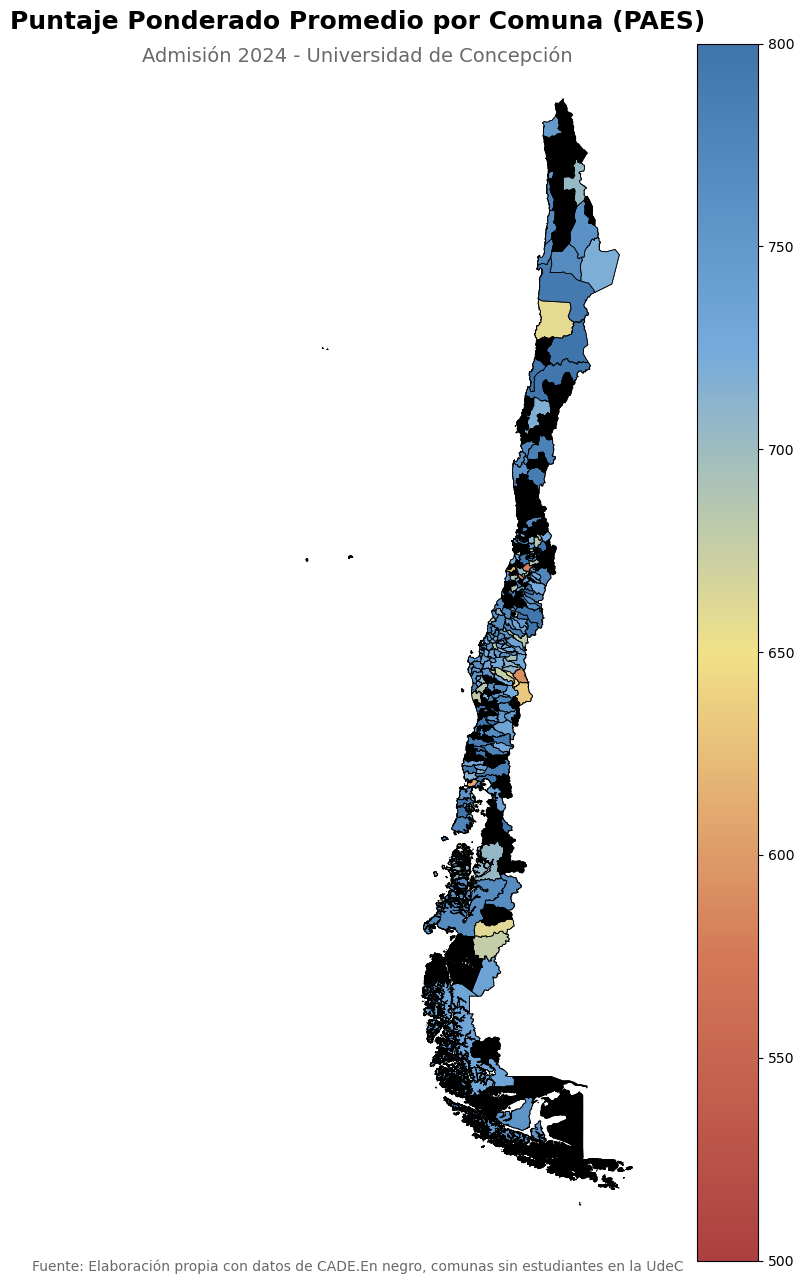

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Crear paleta personalizada
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blue_red",
    ["#AC4040", "#D47958", "#F1E189", "#75AADB", "#4075AC"]
)

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(10, 13))

# 1. Graficar todas las comunas con puntaje distinto de 0
comunas_mapa[comunas_mapa["puntaje_ponderado"] != 0].plot(
    column="puntaje_ponderado",
    cmap=custom_cmap,
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax,
    vmin=500,
    vmax=800
)

# 2. Sobreponer comunas con puntaje 0 en negro
comunas_mapa[comunas_mapa["puntaje_ponderado"] == 0].plot(
    color="black",
    linewidth=0.6,
    edgecolor="black",
    ax=ax
)

# Título
plt.suptitle("Puntaje Ponderado Promedio por Comuna (PAES)",
             fontsize=18, weight="bold", color="black", y=0.98)

# Subtítulo
plt.figtext(0.5, 0.94, "Admisión 2024 - Universidad de Concepción",
            ha='center', fontsize=14, color="dimgray")

# Caption principal
plt.figtext(0.5, 0.01,
            "Fuente: Elaboración propia con datos de CADE."
            "En negro, comunas sin estudiantes en la UdeC",
            wrap=True, horizontalalignment='center', fontsize=10, color="dimgray")


# Eliminar ejes
ax.axis("off")

# Ajustar márgenes
plt.tight_layout()
plt.show()



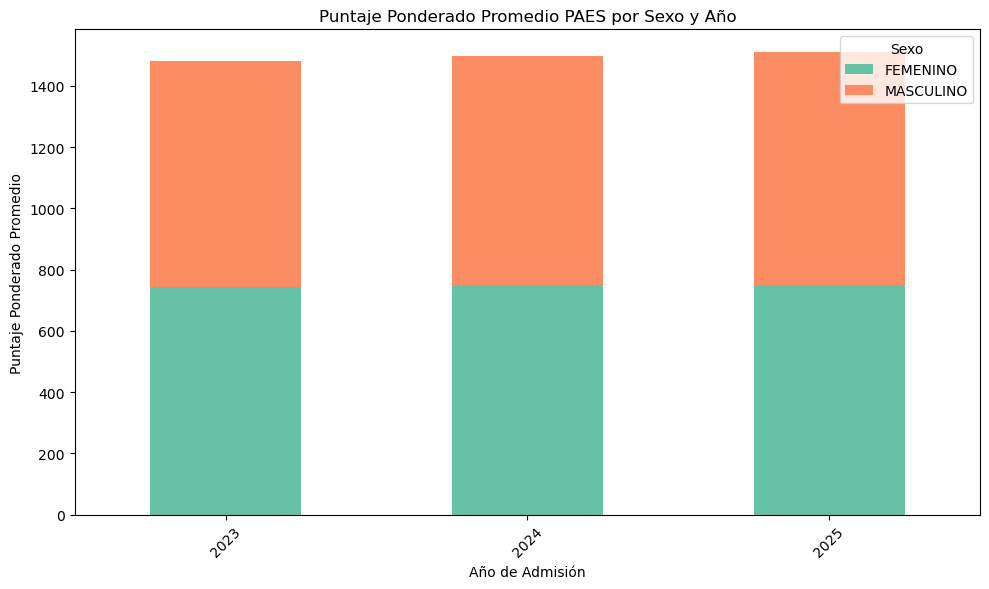

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos válidos
df_viz = base_total[
    base_total["SEXO"].isin(["FEMENINO", "MASCULINO"])
].copy()

# Asegurar que ANIO sea string
df_viz["ANIO"] = df_viz["ANIO"].astype(str)

# Agrupar por año y sexo, calcular promedio
df_grouped = df_viz.groupby(["ANIO", "SEXO"])["PTJE_PONDERADO"].mean().reset_index()

# Pivotear para gráfico apilado
df_pivot = df_grouped.pivot(index="ANIO", columns="SEXO", values="PTJE_PONDERADO")

# Crear gráfico de barras apiladas
df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#66c2a5", "#fc8d62"]  # Puedes ajustar colores si lo deseas
)

plt.title("Puntaje Ponderado Promedio PAES por Sexo y Año")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.xticks(rotation=45)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()



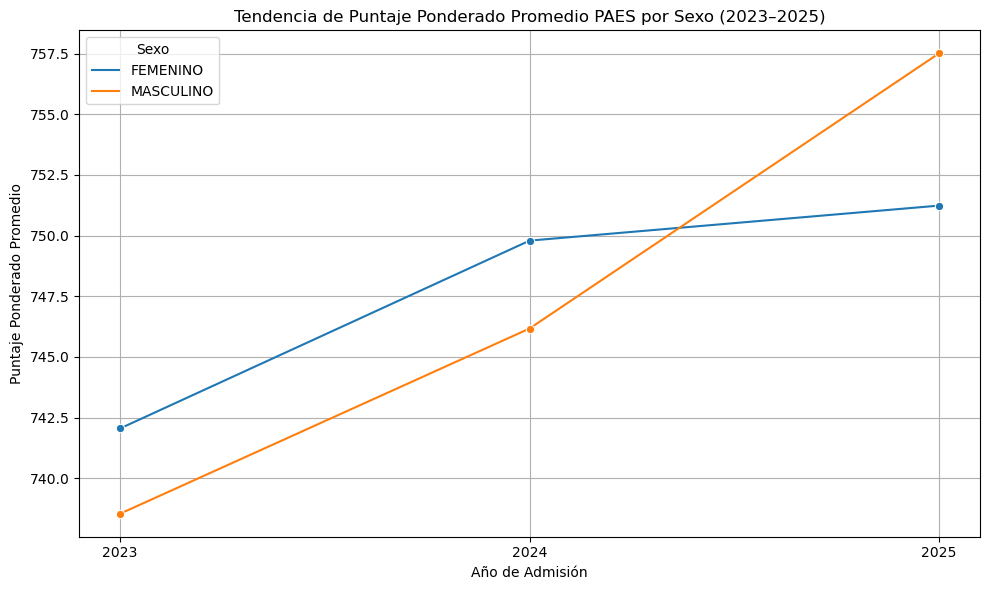

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que ANIO sea string para el eje x
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Agrupar por año y sexo, calcular promedio del puntaje
df_grouped = base_total.groupby(["ANIO", "SEXO"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="ANIO", y="PTJE_PONDERADO", hue="SEXO", marker="o")

# Títulos y etiquetas
plt.title("Tendencia de Puntaje Ponderado Promedio PAES por Sexo (2023–2025)")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.legend(title="Sexo")
plt.grid(True)
plt.tight_layout()
plt.show()


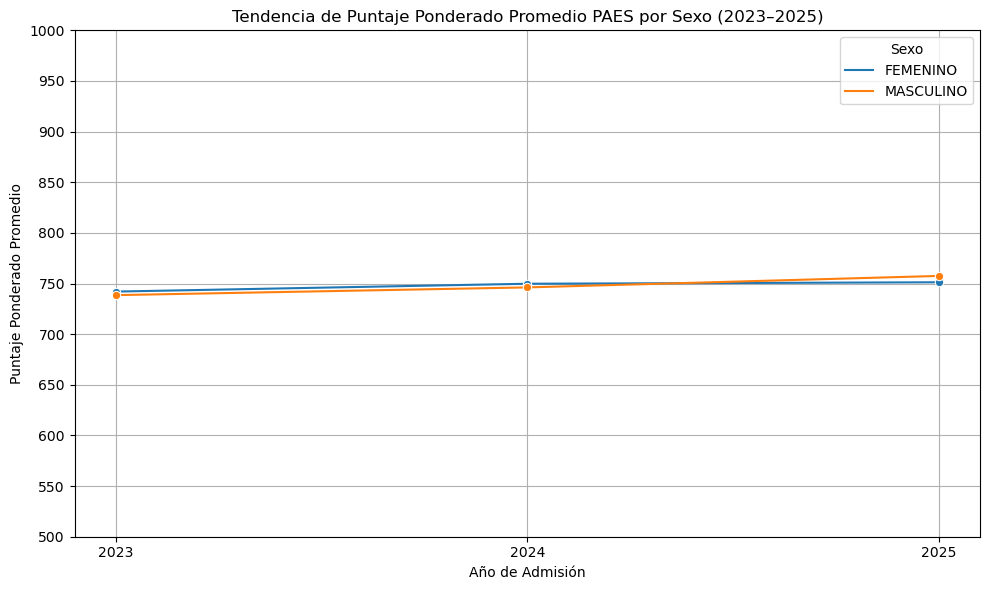

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurarse de que ANIO sea string para el eje x
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Agrupar por año y sexo, calcular promedio del puntaje
df_grouped = base_total.groupby(["ANIO", "SEXO"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="ANIO", y="PTJE_PONDERADO", hue="SEXO", marker="o")

# Personalizar eje Y
plt.ylim(500, 1000)
plt.yticks(np.arange(500, 1001, 50))  # marcas cada 50 puntos

# Títulos y etiquetas
plt.title("Tendencia de Puntaje Ponderado Promedio PAES por Sexo (2023–2025)")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.legend(title="Sexo")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Agrupar por ANIO, SEXO y CARRERA (asumo que la columna se llama 'CARRERA')
df_n_por_sexo = base_total.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")

# Mostrar los primeros resultados
print(df_n_por_sexo.head())


   ANIO      SEXO                                    CARRERA   N
0  2023  FEMENINO  Administración Pública y Ciencia Política  45
1  2023  FEMENINO                                  Agronomía  59
2  2023  FEMENINO                               Antropología  43
3  2023  FEMENINO                               Arquitectura  59
4  2023  FEMENINO                             Artes Visuales  42


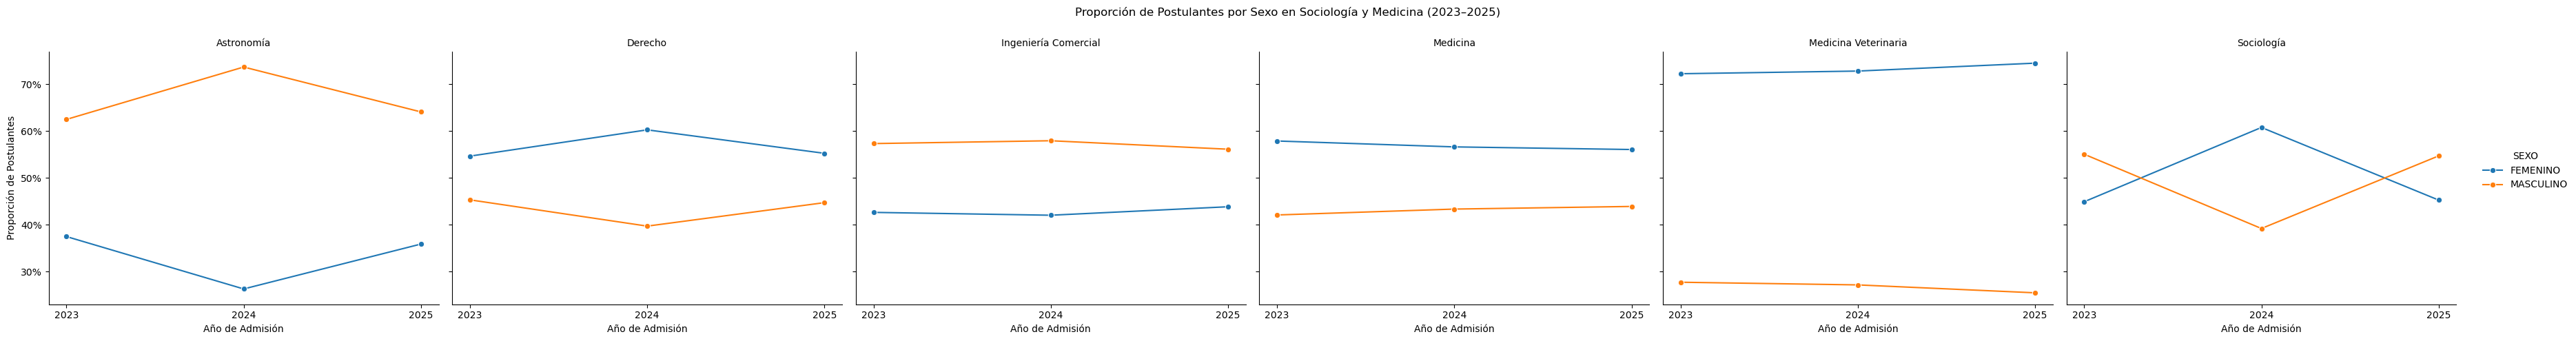

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las carreras Sociología y Medicina
df_filtrado = base_total[
    base_total["CARRERA"].str.lower().str.contains("sociología|medicina|ingeniería comercial|astronomía|derecho")
].copy()

# Asegurar que ANIO sea string
df_filtrado["ANIO"] = df_filtrado["ANIO"].astype(str)

# Calcular N por ANIO, SEXO y CARRERA
df_n = df_filtrado.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")

# Calcular proporciones dentro de cada ANIO y CARRERA
df_n["TOTAL"] = df_n.groupby(["ANIO", "CARRERA"])["N"].transform("sum")
df_n["PROPORCION"] = df_n["N"] / df_n["TOTAL"]

# Crear gráfico de líneas proporcionales (faceteado por carrera)
g = sns.FacetGrid(df_n, col="CARRERA", hue="SEXO", height=5, aspect=1.2, sharey=True)
g.map(sns.lineplot, "ANIO", "PROPORCION", marker="o").add_legend()

# Títulos y etiquetas
g.set_axis_labels("Año de Admisión", "Proporción de Postulantes")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Proporción de Postulantes por Sexo en Sociología y Medicina (2023–2025)")

# Opcional: formato porcentual en eje Y
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()



In [52]:
%No 
import pandas as pd
import geopandas as gpd
import glob

# Cargar base CSV
base_total = pd.read_csv("bbdd/base_total_.csv")

# Estandarizar código comuna
base_total["CODIGO_COMUNA"] = base_total["CODIGO_COMUNA"].astype(str).str.zfill(5)

# Unir archivos GeoJSON de comunas
geojson_files = glob.glob("comunas_geojson/R*.geojson")
comunas_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(file) for file in geojson_files],
    ignore_index=True
))

# Renombrar columna comunal del shapefile
comunas_gdf["codigo_comuna_geo"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Unir geometría a base_total (mantiene todos los datos)
base_total_geo = pd.merge(
    base_total,
    comunas_gdf[["codigo_comuna_geo", "geometry"]],
    left_on="CODIGO_COMUNA",
    right_on="codigo_comuna_geo",
    how="left"
)

# Eliminar columna duplicada que no queremos
base_total_geo = base_total_geo.drop(columns=["codigo_comuna_geo"])

# Convertir a GeoDataFrame
base_total_geo = gpd.GeoDataFrame(base_total_geo, geometry="geometry")

# Exportar como GeoPackage
base_total_geo.to_file("bbdd/base_total.gpkg", layer="datos", driver="GPKG")

UsageError: Line magic function `%No` not found.


In [29]:
%No
import pandas as pd
import geopandas as gpd
import glob

# Cargar base CSV
base_total = pd.read_csv("bbdd/base_total.csv")

# Estandarizar código comuna
base_total["CODIGO_COMUNA"] = base_total["CODIGO_COMUNA"].astype(str).str.zfill(5)

# Unir archivos GeoJSON de comunas
geojson_files = glob.glob("comunas_geojson/R*.geojson")
comunas_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(file) for file in geojson_files],
    ignore_index=True
))

# Renombrar columna comunal del shapefile
comunas_gdf["codigo_comuna_geo"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Unir geometría a base_total (mantiene todos los datos)
base_total_geo = pd.merge(
    base_total,
    comunas_gdf[["codigo_comuna_geo", "geometry"]],
    left_on="CODIGO_COMUNA",
    right_on="codigo_comuna_geo",
    how="left"
)

# Eliminar columna duplicada que no queremos
base_total_geo = base_total_geo.drop(columns=["codigo_comuna_geo"])

# Convertir a GeoDataFrame
base_total_geo = gpd.GeoDataFrame(base_total_geo, geometry="geometry")

# Exportar como GeoPackage
base_total_geo.to_file("bbdd/base_total.gpkg", layer="datos", driver="GPKG")

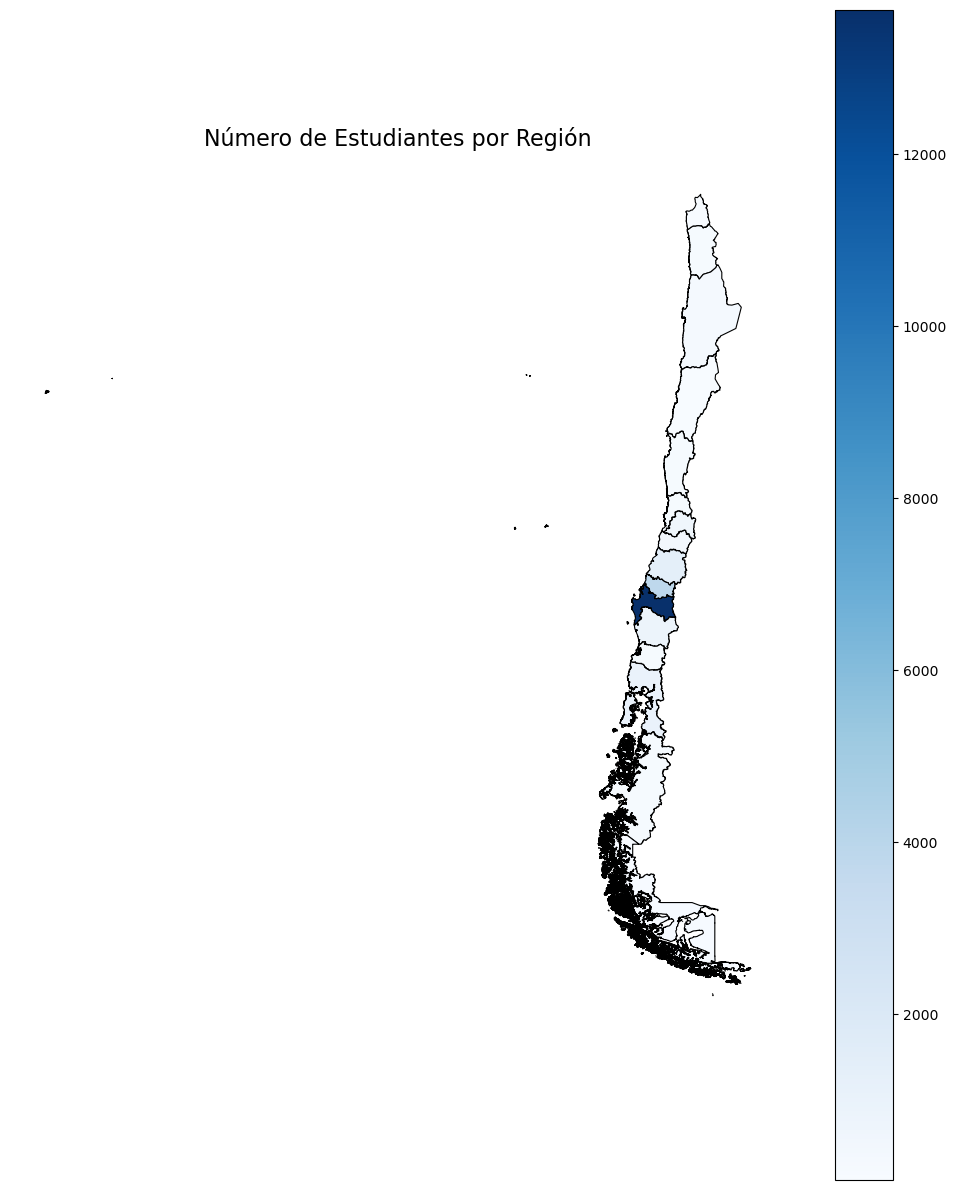

In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob

# 1. Cargar base de estudiantes
base_total = pd.read_csv("bbdd/base_total_filtrada.csv")

# 2. Asegurar que el código de región esté estandarizado (a 2 dígitos, tipo str)
base_total["CODIGO_REGION"] = base_total["CODIGO_REGION"].astype(str).str.zfill(2)

# 3. Agrupar por región
region_count = base_total.groupby("CODIGO_REGION").size().reset_index(name="N_ESTUDIANTES")

# 4. Unir archivos geojson de comunas
geojson_files = glob.glob("comunas_geojson/R*.geojson")
comunas = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(f) for f in geojson_files], ignore_index=True
))

# 5. Estandarizar código región en geo
comunas["REGION"] = comunas["REGION"].astype(str).str.zfill(2)

# 6. Agrupar geometría a nivel regional (dissolve por región)
regiones = comunas.dissolve(by="REGION", as_index=False)

# 7. Unir cantidad de estudiantes por región con geometría
gdf_regiones = regiones.merge(region_count, left_on="REGION", right_on="CODIGO_REGION", how="left")

# 8. Llenar regiones sin estudiantes con 0
gdf_regiones["N_ESTUDIANTES"] = gdf_regiones["N_ESTUDIANTES"].fillna(0)

# 9. Plotear mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf_regiones.plot(
    column="N_ESTUDIANTES",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)
ax.set_title("Número de Estudiantes por Región", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()

# 10. Guardar base agregada si la necesitas
gdf_regiones.to_file("bbdd/regiones_estudiantes.gpkg", layer="estudiantes", driver="GPKG")
